## Problem1

A certain food-based company conducted a survey with the help of a fitness company to find the relationship between a person’s weight gain and the number of calories they consumed in order to come up with diet plans for these individuals. Build a Simple Linear Regression model with calories consumed as the target variable. Apply necessary transformations and record the RMSE and correlation coefficient values for different models. 

In [1]:
# Importing necessary libraries
import pandas as pd # deals with data frame  
import numpy as np  # deals with numerical values

wcat = pd.read_csv("calories_consumed.csv")

# Exploratory data analysis:
# 1. Measures of central tendency
# 2. Measures of dispersion
# 3. Third moment business decision
# 4. Fourth moment business decision
# 5. Probability distributions of variables 
# 6. Graphical representations (Histogram, Box plot, Dot plot, Stem & Leaf plot, Bar plot, etc.)

wcat.describe()



,Weight gained (grams),Calories Consumed
count,14.000000,14.000000
mean,357.714286,2340.714286
std,333.692495,752.109488
min,62.000000,1400.000000
25%,114.500000,1727.500000
50%,200.000000,2250.000000
75%,537.500000,2775.000000
max,1100.000000,3900.000000


In [10]:
wcat.shape

(14, 2)

<AxesSubplot:xlabel='Weight gained (grams)', ylabel='Density'>

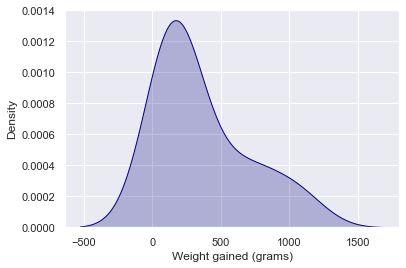

In [15]:
#Graphical Representation
import matplotlib.pyplot as plt # mostly used for visualization purposes
import seaborn as sns
sns.set()

#plt.bar(height = wcat['Weight gained (grams)'], x = np.arange(100, 1100, 100))

sns.kdeplot(data=wcat,x= wcat['Weight gained (grams)'],fill=True,color="navy")

(array([6., 2., 2., 0., 0., 1., 1., 0., 1., 1.]),
 array([  62. ,  165.8,  269.6,  373.4,  477.2,  581. ,  684.8,  788.6,
         892.4,  996.2, 1100. ]),
 <BarContainer object of 10 artists>)

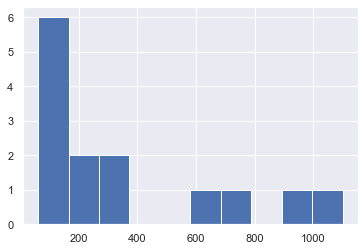

In [18]:
plt.hist(wcat['Weight gained (grams)']) #histogram

{'whiskers': [<matplotlib.lines.Line2D at 0x2195b0f7b20>,
 'caps': [<matplotlib.lines.Line2D at 0x2195b1071c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2195b0f76d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2195b1078e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2195b107c70>],
 'means': []}

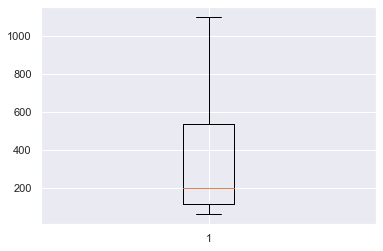

In [19]:
plt.boxplot(wcat['Weight gained (grams)']) #boxplot

<AxesSubplot:xlabel='Calories Consumed', ylabel='Density'>

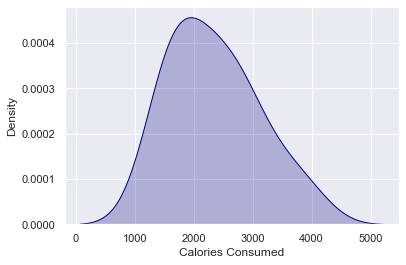

In [21]:
sns.kdeplot(data=wcat,x= wcat['Calories Consumed'],fill=True,color="navy")

(array([3., 1., 2., 2., 1., 2., 1., 0., 1., 1.]),
 array([1400., 1650., 1900., 2150., 2400., 2650., 2900., 3150., 3400.,
        3650., 3900.]),
 <BarContainer object of 10 artists>)

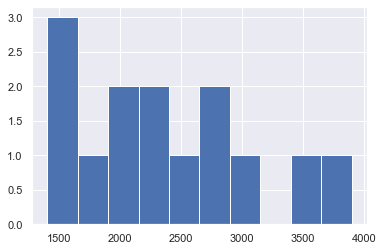

In [22]:
plt.hist(wcat['Calories Consumed']) #histogram

{'whiskers': [<matplotlib.lines.Line2D at 0x219520f8250>,
 'caps': [<matplotlib.lines.Line2D at 0x21952150430>,
 'boxes': [<matplotlib.lines.Line2D at 0x2195219f460>],
 'medians': [<matplotlib.lines.Line2D at 0x21952172b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x219521726d0>],
 'means': []}

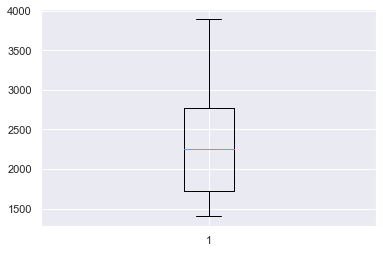

In [23]:
plt.boxplot(wcat['Calories Consumed']) #boxplot

### Bivariate

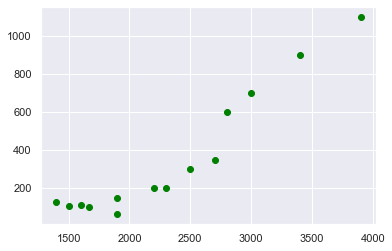

In [25]:
# Scatter plot
plt.scatter(x = wcat['Calories Consumed'], y = wcat['Weight gained (grams)'], color = 'green')


In [24]:
wcat.columns

Index(['Weight gained (grams)', 'Calories Consumed'], dtype='object')

In [26]:
# correlation
np.corrcoef(wcat['Weight gained (grams)'], wcat['Calories Consumed']) 

array([[1.        , 0.94699101],
       [0.94699101, 1.        ]])

In [27]:
# Covariance
# NumPy does not have a function to calculate the covariance between two variables directly. 
# Function for calculating a covariance matrix called cov() 
# By default, the cov() function will calculate the unbiased or sample covariance between the provided random variables.

cov_output = np.cov(wcat['Weight gained (grams)'], wcat['Calories Consumed'])[0, 1]
cov_output



237669.4505494506

In [30]:
wcat.rename(columns={'Weight gained (grams)': 'WeightGained', 'Calories Consumed': 'CaloriesConsumed'}, inplace=True)

In [31]:
# wcat.cov()


# Import library
import statsmodels.formula.api as smf

# Simple Linear Regression
model = smf.ols('WeightGained ~ CaloriesConsumed', data = wcat).fit()
model.summary()


c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           WeightGained   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           2.86e-07
Time:                        08:58:58   Log-Likelihood:                -84.792
No. Observations:                  14   AIC:                             173.6
Df Residuals:                      12   BIC:                             174.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -625.7524    100.823     -6.206      0.000    -845.427    -406.078
CaloriesConsumed     0.4202      0.041     10.211      0.000       0.331       0.510
==============================================================================
Omnibus:                        3.394   Durbin-Watson:                   2.537
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                1.227
Skew:                          -0.203   Prob(JB):                        0.541
Kurtosis:                       1.608   Cond. No.                     8.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
wcat.columns

Index(['WeightGained', 'CaloriesConsumed'], dtype='object')

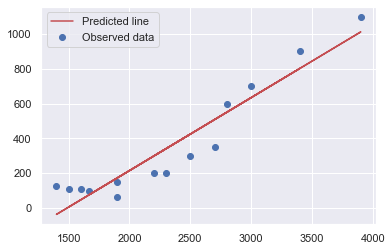

In [34]:
pred1 = model.predict(pd.DataFrame(wcat['CaloriesConsumed']))

# Regression Line
plt.scatter(wcat.CaloriesConsumed, wcat.WeightGained)
plt.plot(wcat.CaloriesConsumed, pred1, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [36]:
# Error calculation
res1 = wcat.WeightGained - pred1
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

103.30250194726935

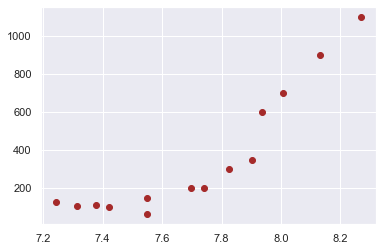

In [37]:
######### Model building on Transformed Data
# Log Transformation
# x = log(waist); y = at

plt.scatter(x = np.log(wcat['CaloriesConsumed']), y = wcat['WeightGained'], color = 'brown')

In [38]:
np.corrcoef(np.log(wcat.CaloriesConsumed), wcat.WeightGained) #correlation

array([[1.        , 0.89872528],
       [0.89872528, 1.        ]])

In [39]:
model2 = smf.ols('WeightGained ~ np.log(CaloriesConsumed)', data = wcat).fit()
model2.summary()

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           WeightGained   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     50.40
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           1.25e-05
Time:                        09:01:02   Log-Likelihood:                -89.148
No. Observations:                  14   AIC:                             182.3
Df Residuals:                      12   BIC:                             183.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -6955.6501   1030.908     -6.747      0.000   -9201.806   -4709.494
np.log(CaloriesConsumed)   948.3717    133.580      7.100      0.000     657.325    1239.418
==============================================================================
Omnibus:                        3.265   Durbin-Watson:                   2.438
Prob(Omnibus):                  0.195   Jarque-Bera (JB):                1.139
Skew:                           0.046   Prob(JB):                        0.566
Kurtosis:                       1.606   Cond. No.                         199.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

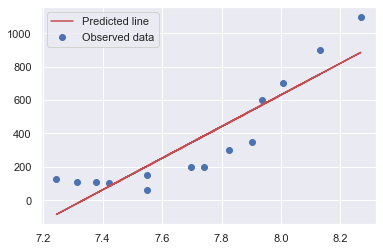

In [40]:
pred2 = model2.predict(pd.DataFrame(wcat['CaloriesConsumed']))

# Regression Line
plt.scatter(np.log(wcat.CaloriesConsumed), wcat.WeightGained)
plt.plot(np.log(wcat.CaloriesConsumed), pred2, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()


In [41]:
# Error calculation
res2 = wcat.WeightGained - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

141.00538169425104

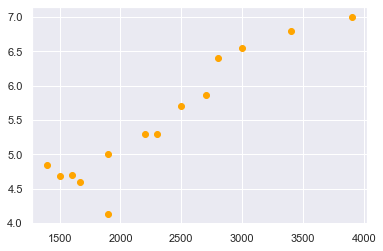

In [42]:
#### Exponential transformation
# x = waist; y = log(at)

plt.scatter(x = wcat['CaloriesConsumed'], y = np.log(wcat['WeightGained']), color = 'orange')

In [43]:
np.corrcoef(wcat.CaloriesConsumed, np.log(wcat.WeightGained)) #correlation

array([[1.        , 0.93680369],
       [0.93680369, 1.        ]])

In [44]:
model3 = smf.ols('np.log(WeightGained) ~ CaloriesConsumed', data = wcat).fit()
model3.summary()

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(WeightGained)   R-squared:                       0.878
Model:                              OLS   Adj. R-squared:                  0.867
Method:                   Least Squares   F-statistic:                     86.04
Date:                  Tue, 19 Apr 2022   Prob (F-statistic):           8.02e-07
Time:                          09:03:21   Log-Likelihood:                -3.3244
No. Observations:                    14   AIC:                             10.65
Df Residuals:                        12   BIC:                             11.93
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.8387      0.299      9.479      0.000       2.186       3.491
CaloriesConsumed     0.0011      0.000      9.276      0.000       0.001       0.001
==============================================================================
Omnibus:                       10.165   Durbin-Watson:                   3.130
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                6.120
Skew:                          -1.240   Prob(JB):                       0.0469
Kurtosis:                       5.083   Cond. No.                     8.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
pred3 = model3.predict(pd.DataFrame(wcat['CaloriesConsumed']))
pred3_at = np.exp(pred3)
pred3_at

0       93.603577
1      231.816603
2      806.661188
3      206.972681
4      290.808810
5      104.839263
6       83.572027
7      147.305340
8      408.603511
9     1421.833419
10     113.497427
11     147.305340
12     364.813232
13     512.584083
dtype: float64

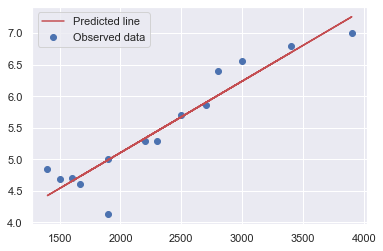

In [46]:
# Regression Line
plt.scatter(wcat.CaloriesConsumed, np.log(wcat.WeightGained))
plt.plot(wcat.CaloriesConsumed, pred3, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [47]:
# Error calculation
res3 = wcat.WeightGained - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

118.04515720118017

In [48]:
#### Polynomial transformation
# x = waist; x^2 = waist*waist; y = log(at)

model4 = smf.ols('np.log(WeightGained) ~ CaloriesConsumed + I(CaloriesConsumed*CaloriesConsumed)', data = wcat).fit()
model4.summary()

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(WeightGained)   R-squared:                       0.878
Model:                              OLS   Adj. R-squared:                  0.855
Method:                   Least Squares   F-statistic:                     39.44
Date:                  Tue, 19 Apr 2022   Prob (F-statistic):           9.61e-06
Time:                          09:04:34   Log-Likelihood:                -3.3243
No. Observations:                    14   AIC:                             12.65
Df Residuals:                        11   BIC:                             14.57
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  2.8287      1.062      2.664      0.022       0.492       5.165
CaloriesConsumed                           0.0011      0.001      1.297      0.221      -0.001       0.003
I(CaloriesConsumed * CaloriesConsumed) -1.675e-09   1.71e-07     -0.010      0.992   -3.77e-07    3.74e-07
==============================================================================
Omnibus:                       10.177   Durbin-Watson:                   3.131
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                6.133
Skew:                          -1.240   Prob(JB):                       0.0466
Kurtosis:                       5.088   Cond. No.                     8.12e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.12e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
pred4 = model4.predict(pd.DataFrame(wcat))
pred4_at = np.exp(pred4)
pred4_at

0       93.519497
1      232.013330
2      806.459099
3      207.127381
4      291.085209
5      104.780251
6       83.466143
7      147.341113
8      408.951512
9     1418.864795
10     113.457933
11     147.341113
12     365.148180
13     512.900975
dtype: float64

In [50]:
# Regression line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = wcat.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)
# y = wcat.iloc[:, 1].values

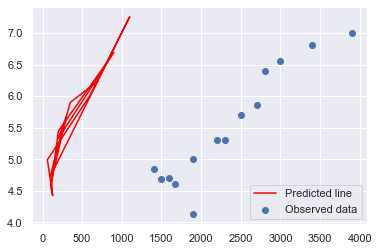

In [51]:
plt.scatter(wcat.CaloriesConsumed, np.log(wcat.WeightGained))
plt.plot(X, pred4, color = 'red')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [53]:
# Error calculation
res4 = wcat.WeightGained - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

117.41450013064909

In [54]:
# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE
0,SLR,103.302502
1,Log model,141.005382
2,Exp model,118.045157
3,Poly model,117.414500


In [55]:
###################
# The best model

from sklearn.model_selection import train_test_split

train, test = train_test_split(wcat, test_size = 0.2)

finalmodel = smf.ols('WeightGained ~ CaloriesConsumed', data = wcat).fit()
finalmodel.summary()
# Simple Linear Regression



c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           WeightGained   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           2.86e-07
Time:                        09:07:47   Log-Likelihood:                -84.792
No. Observations:                  14   AIC:                             173.6
Df Residuals:                      12   BIC:                             174.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -625.7524    100.823     -6.206      0.000    -845.427    -406.078
CaloriesConsumed     0.4202      0.041     10.211      0.000       0.331       0.510
==============================================================================
Omnibus:                        3.394   Durbin-Watson:                   2.537
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                1.227
Skew:                          -0.203   Prob(JB):                        0.541
Kurtosis:                       1.608   Cond. No.                     8.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
# Predict on test data
test_pred = finalmodel.predict(pd.DataFrame(test))
test_pred

0       4.482599
8     550.686227
9    1012.858527
dtype: float64

In [59]:
# Model Evaluation on Test data
test_res = test.WeightGained - test_pred
test_sqrs = test_res * test_res
test_mse = np.mean(test_sqrs)
test_rmse = np.sqrt(test_mse)
test_rmse

83.14913683127848

In [60]:
# Prediction on train data
train_pred = finalmodel.predict(pd.DataFrame(train))
train_pred

2     802.780209
6     -37.533065
12    508.670563
1     340.607908
13    634.717554
7     172.545254
3     298.592245
11    172.545254
5      46.498263
10     75.909227
4     424.639236
dtype: float64

In [61]:
# Model Evaluation on train data
train_res = train.WeightGained -train_pred
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)
train_rmse



108.14903851653396